<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [459]:
#Importation de la librairie Pandas
import pandas as pd
import plotly.express as px
import numpy as np
import missingno as msno
import urllib.request
import chardet

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [460]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements du fichiers csv</h3>
</div>

Nous obtenons une erreur en chargeant directement la base caracteristiques_vins.csv, elle est de type <code>UnicodeDecodeError</code>, ce qui semble être liée à l'encodage du fichier.
Nous allons utiliser la bibliothèque <code>chardet</code> pour tenter d'identifier l'encodage du fichier

In [461]:
#Identification de l'encodage du fichier
file_path = "caracteristiques_vins.csv"
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']
encoding = detect_encoding(file_path)
print(encoding)

Windows-1252


In [462]:
#import du fichier csv avec délimiteur ";" et l'encodage "Windows-1252"
df_caracteristiques = pd.read_csv("caracteristiques_vins.csv", sep = ";", encoding = "Windows-1252")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [463]:
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [464]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))
df_erp.shape

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 5 colonne(s)


(825, 5)

In [465]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_erp.count()

,0
product_id,825
onsale_web,825
price,825
stock_quantity,825
stock_status,825


In [466]:
#Consulter le nombre de colonnes et la nature des données dans chacune des colonnes
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [467]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublons_erp = df_erp.duplicated().sum()
print("Le fichier sondé a", doublons_erp, "doublons")


Le fichier sondé a 0 doublons


In [468]:
#Affichage des valeurs distinctes de la colonne stock_status
df_erp["stock_status"].unique()

#La colonne "stock_status est liée à la colonne "stock_quantity"

array(['outofstock', 'instock'], dtype=object)

In [469]:
#Création d'une colonne "stock_status_2 pour s'assurer qu'il n'y a pas d'erreur de statut.
#La valeur de cette nouvelle colonne dépendra de la valeur de "stock_quantity"

df_erp["stock_status_2"] = df_erp["stock_quantity"].apply(lambda x: "outofstock" if x == 0 else "instock")

In [470]:
#On supprime la colonne stock_status et on renomme la colonne stock_status_2 en stock_status
df_erp = df_erp.drop(columns = {"stock_status"})
df_erp = df_erp.rename(columns ={"stock_status_2":"stock_status"})

In [471]:
df_erp["stock_status"] = df_erp["stock_status"].astype(str)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

In [472]:
df_erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [473]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
valeurs_manquantes = df_erp[df_erp['price'].isnull()]
print("Nombres d'article avec un prix non renseignés: {}".format(valeurs_manquantes.shape[0])) #Saisir l'instruction manquante dans la fonction format

Nombres d'article avec un prix non renseignés: 0


In [474]:
#Afficher le prix minimum de la colonne "price"
df_erp['price'].min()

5.2

In [475]:
#Afficher le prix maximum de la colonne "price"
df_erp['price'].max()

225.0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [476]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
df_erp['stock_quantity'].min()

0

In [477]:
#Afficher la quantité maximum de la colonne "stock_quantity"
df_erp['stock_quantity'].max()

578

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [478]:
#Dimension du dataset
#Nombre d'observations (lignes)
#Nombre de caractéristiques (colonnes)
print("Le fichier a",df_web.shape[0],"lignes et",df_web.shape[1],"colonnes")
df_web.shape

Le fichier a 1513 lignes et 28 colonnes


(1513, 28)

In [479]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
df_web.dtypes

,0
sku,object
virtual,int64
downloadable,int64
rating_count,int64
average_rating,float64
total_sales,float64
tax_status,object
tax_class,float64
post_author,float64
post_date,datetime64[ns]


In [480]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_web.count()

,0
sku,1428
virtual,1513
downloadable,1513
rating_count,1513
average_rating,1430
total_sales,1430
tax_status,716
tax_class,0
post_author,1430
post_date,1430


In [481]:
#Déterminons les colonnes à conserver
df_web['sku'].unique()
print(df_web['virtual'].unique()) # Ne comporte que des valeurs = 0 --> A SUPPRIMER
print(df_web['downloadable'].unique()) # Ne comporte que des valeurs = 0 --> A SUPPRIMER
print(df_web['rating_count'].unique()) # Ne comporte que des valeurs = 0 --> A SUPPRIMER
print(df_web['average_rating'].unique()) # Ne comporte que des valeurs = 0 --> A SUPPRIMER
print(df_web['tax_class'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
print(df_web['post_author'].unique()) # Ne comporte que des valeurs 2 --> A SUPPRIMER
df_web['post_date'].unique()
df_web['post_date_gmt'].unique()
print(df_web['post_content'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
df_web['post_title'].unique()
df_web['post_excerpt'].unique()
df_web['post_status'].unique()
print(df_web['comment_status'].unique()) #Ne comport que des valeurs 'closed'
print(df_web['ping_status'].unique()) # Ne comporte que des valeurs 'closed' --> A SUPPRIMER
print(df_web['post_password'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
df_web['post_name'].unique()
df_web['post_modified'].unique()
df_web['post_modified_gmt'].unique()
print(df_web['post_content_filtered'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
print(df_web['post_parent'].unique()) # Ne comporte que des valeurs NaN ou 0 --> A SUPPRIMER
df_web['guid'].unique()
print(df_web['menu_order'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
df_web['post_type'].unique()
print(df_web['post_mime_type'].unique()) # Ne comporte que des valeurs NaN --> A SUPPRIMER
print(df_web['comment_count'].unique()) # Ne comporte que des valeurs NaN ou 0 --> A SUPPRIMER

[0]
[0]
[0]
[ 0. nan]
[nan]
[ 1.  2. nan]
[nan]
['closed' nan]
['closed' nan]
[nan]
[nan]
[ 0. nan]
[ 0. nan]
[nan 'image/jpeg']
[ 0. nan]


In [482]:
#On supprime donc les colonnes inutiles
df_web = df_web.drop(columns=['virtual', 'downloadable', 'rating_count','average_rating','tax_class','post_author', 'post_content', 'comment_status', 'ping_status', 'post_password', 'post_content_filtered', 'post_parent', 'menu_order', 'post_mime_type', 'comment_count'])

In [483]:
df_web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                1428 non-null   object        
 1   total_sales        1430 non-null   float64       
 2   tax_status         716 non-null    object        
 3   post_date          1430 non-null   datetime64[ns]
 4   post_date_gmt      1430 non-null   datetime64[ns]
 5   post_title         1430 non-null   object        
 6   post_excerpt       716 non-null    object        
 7   post_status        1430 non-null   object        
 8   post_name          1430 non-null   object        
 9   post_modified      1430 non-null   datetime64[ns]
 10  post_modified_gmt  1430 non-null   datetime64[ns]
 11  guid               1430 non-null   object        
 12  post_type          1430 non-null   object        
dtypes: datetime64[ns](4), float64(1), object(8)
memory usage: 153.8

In [484]:
#Visualisation des valeurs de la colonne sku
df_web['sku'].unique()

array(['bon-cadeau-25-euros', 15298, 15296, 15300, 19814, 19815, 15303,
       14975, 16042, 14980, 16041, 15269, 14977, 16044, 16043, 16449,
       16045, 16030, 13127, 19816, 16029, 16039, 16318, 16275, 16498,
       16320, 16319, 15966, 15022, 15967, 15490, 16416, 11862, 15444,
       15953, 12045, 13074, 15941, 16069, 13072, 15440, 13435, 13078,
       13117, 16296, 16014, 16462, 16013, 16180, 15676, 16120, 15564,
       15675, 15378, 15813, 13416, 14905, 15767, 16505, 15683, 16504,
       15787, 14800, 15353, 15382, 15339, 11668, 13209, 15341, 13217, 304,
       11641, 1662, 1360, 15648, 1364, 7086, 1366, 15140, 16238, 16237,
       15141, 14944, 14941, 14751, 16093, 15668, 15373, 15375, 14474,
       15482, 13453, 15075, 16124, 15785, 15784, 15786, 14332, 16210,
       16211, 16209, 15629, 15583, 16160, 16166, 15783, 16560, 15747,
       15746, 16190, 16189, 16265, 16191, 16263, 15605, 16529, 15441,
       13032, 16256, 16322, 16295, 15656, 15655, 15415, 15414, 15413,
       1602

In [485]:
#On voit que certains des codes articles ne respectant pas la régle de codification
#On veut isoler toutes les valeurs de type string qui contiennent plus de 5 caractères (le format standard du sku ne dépasse jamais cela)
#On supprime les lignes avec les sku intrus
df_web[df_web['sku'].str.len() > 5]

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,bon-cadeau-25-euros,10.0,taxable,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
797,13127-1,0.0,taxable,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product
1209,bon-cadeau-25-euros,10.0,NaN,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,NaN,publish,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
1511,13127-1,0.0,NaN,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,NaN,publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/wp-content/uploads/...,attachment


In [486]:
#On n'affiche pas les codes sku supérieurs à 5 caractères, on crée une colonne qui affiche le nombre de caractères et on filtre
df_web['length_sku'] = df_web['sku'].apply(lambda x: len(str(x)))
df_web = df_web[df_web['length_sku'] <= 5]
df_web.head()

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,length_sku
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,5
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,5
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,5
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,5
5,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,5


In [487]:
#La clé pour chaque ligne est-elle unique ?
doublons_web = df_web['sku'].duplicated().sum()
print(doublons_web)

796


In [488]:
#La clé n'est pas unique, il y'a des doublons. Il faut supprimer les lignes dont le post_type est "attachment"
df_web = df_web[df_web['post_type'] != 'attachment']

In [489]:
doublons_web = df_web['sku'].duplicated().sum()
print(doublons_web)

84


In [490]:
#Il reste 84 doublons qui doivent provenir des valeurs NaN :
df_web.loc[df_web['sku'].isnull()]

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,length_sku
178,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
179,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
227,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
230,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
231,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
793,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
794,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3
795,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,3


<Axes: >

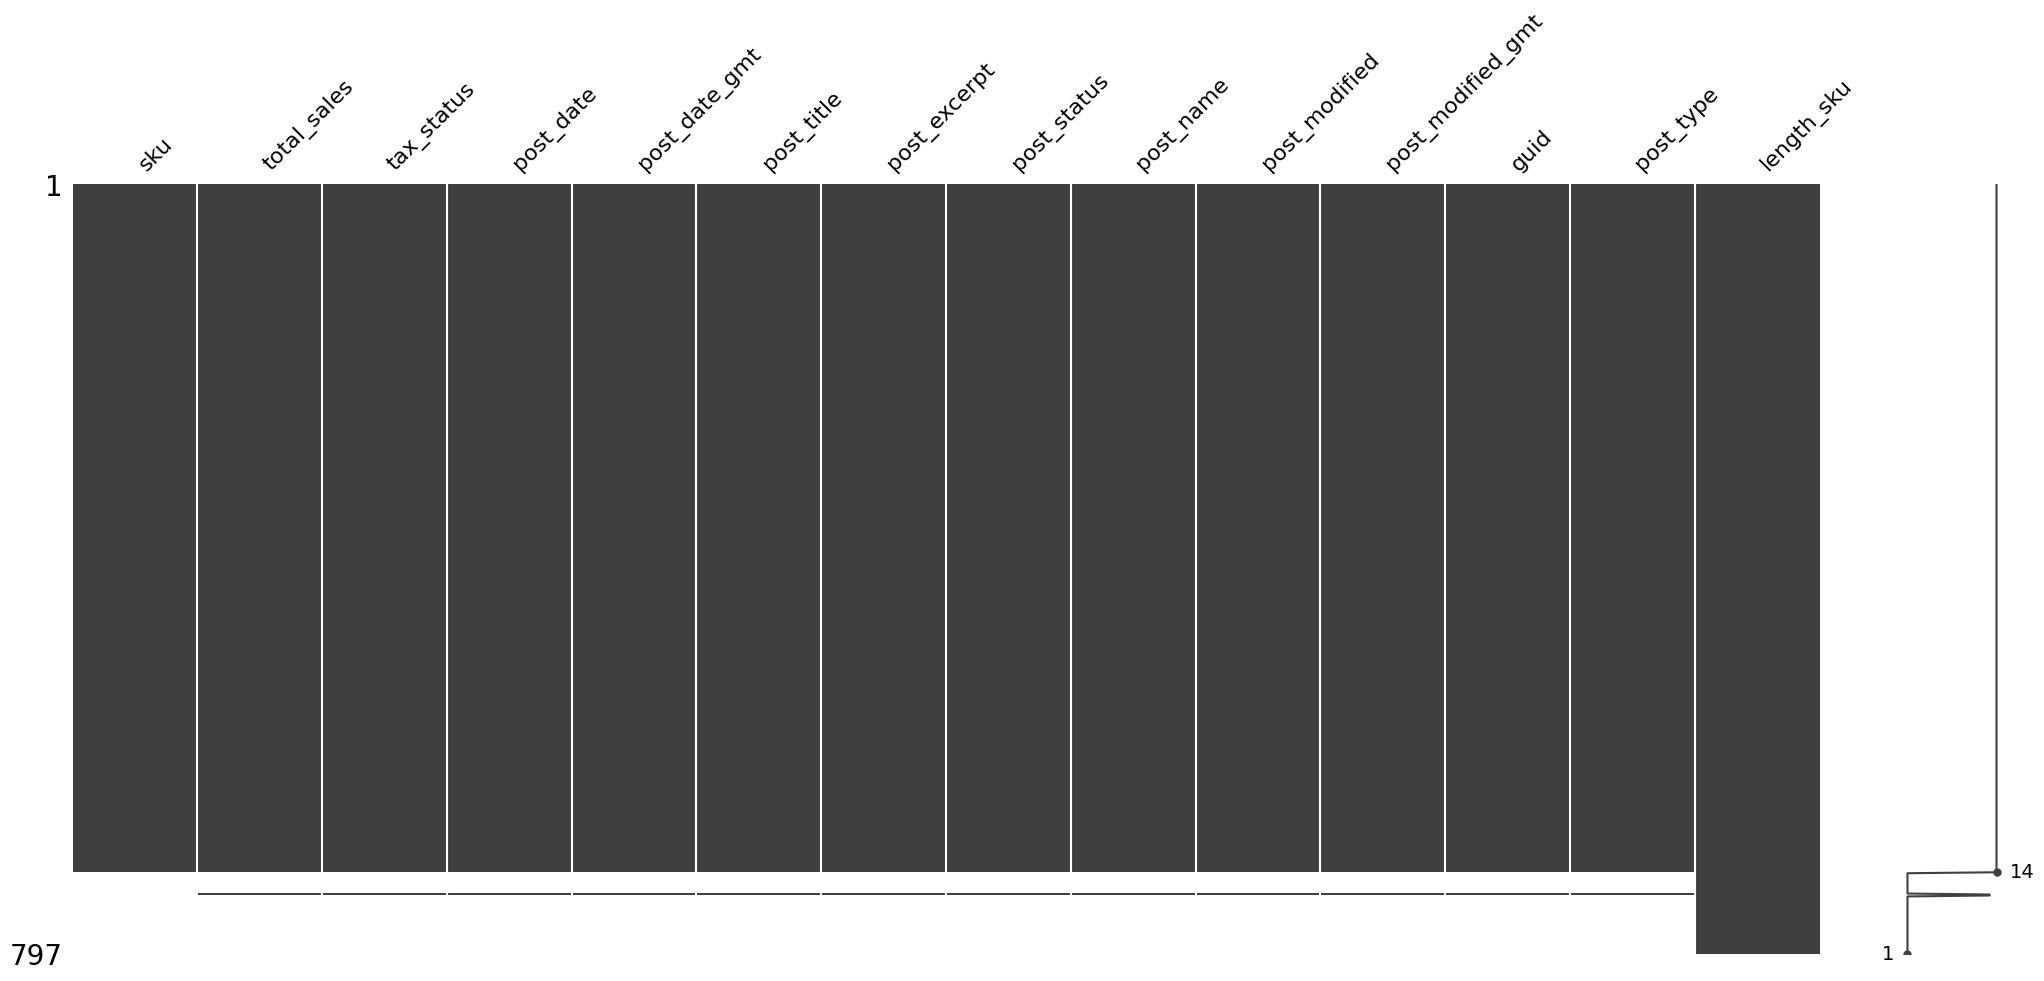

In [491]:
msno.matrix(df_web.sort_values(by=['sku'], axis=0))

In [492]:
#Les lignes sans code article semble être toutes vides mais pour s'en assurer, on va réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_code_article_manquant = df_web.loc[df_web['sku'].isnull()]

In [493]:
#2 - Utiliser la fonction df.info() pour observer le nombre de valeur reseignées dans chacune des colonnes
df_code_article_manquant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 178 to 796
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   total_sales        2 non-null      float64       
 2   tax_status         2 non-null      object        
 3   post_date          2 non-null      datetime64[ns]
 4   post_date_gmt      2 non-null      datetime64[ns]
 5   post_title         2 non-null      object        
 6   post_excerpt       2 non-null      object        
 7   post_status        2 non-null      object        
 8   post_name          2 non-null      object        
 9   post_modified      2 non-null      datetime64[ns]
 10  post_modified_gmt  2 non-null      datetime64[ns]
 11  guid               2 non-null      object        
 12  post_type          2 non-null      object        
 13  length_sku         85 non-null     int64         
dtypes: datetime64[

In [494]:
#Il n'y a pas de valeurs dans ce datarfarme donc nous allons supprimer ces 85 lignes vides
df_web = df_web.loc[~df_web['sku'].isnull()]
df_web.head()

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,length_sku
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,5
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,5
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,5
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,5
5,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,5


In [495]:
doublons_web = df_web['sku'].duplicated().sum()
print(doublons_web)

0


In [496]:
df_web['sku'].shape[0]

712

In [497]:
#On supprime maintenant la colonne length_sku créée pour filtrer
df_web = df_web.drop(columns=['length_sku'])
df_web

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
5,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product
...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,15741,2.0,taxable,2020-04-25 12:49:49,2020-04-25 10:49:49,Le Cèdre de Jean Faure Saint-Emilion 2016,Un nez ouvert sur un velouté de fruits rouges...,publish,cedre-de-jean-faure-saint-emilion-2016,2020-08-27 15:15:02,2020-08-27 13:15:02,https://www.bottle-neck.fr/?post_type=product&...,product
762,16135,5.0,taxable,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product
767,15891,0.0,taxable,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product
768,15887,0.0,taxable,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [498]:
#Dimension du dataset
print("le fichier comporte", df_liaison.shape[0], "lignes et", df_liaison.shape[1], "colonnes.")

le fichier comporte 825 lignes et 2 colonnes.


In [499]:
df_liaison.dtypes

,0
product_id,int64
id_web,object


In [500]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_liaison.count()

,0
product_id,825
id_web,734


In [501]:
#On vérifie que les valeurs de la colonne "product_id" soient toutes uniques
doublons_product_id = (df_liaison['product_id'].duplicated()).sum()
print(doublons_product_id)

0


In [502]:
#On vérifie que les valeurs de la colonne "id_web" soient toutes uniques
doublons_id_web = (df_liaison['id_web'].duplicated()).sum()
print(doublons_id_web)
#90 valeurs en double

90


In [503]:
display(df_liaison)

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [504]:
#Nous avons peut-être des articles sans correspondances :
df_liaison.loc[df_liaison['id_web'].isnull()]

,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [505]:
# Il faut supprimer les articles sans correspondance
df_liaison = df_liaison.dropna()
df_liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.4 - Analyse exploratoire du fichier caracteristiques_vins.xlsx</h3>
</div>

In [506]:
#Dimension du dataset
print("Le fichier contient", df_caracteristiques.shape[0], "lignes et", df_caracteristiques.shape[1], "colonnes")

Le fichier contient 611 lignes et 13 colonnes


In [507]:
df_caracteristiques.dtypes

,0
post_name,object
poids,object
Région,object
Domaine,object
Appellation,object
Couleur,object
Cépage,object
Millésime,float64
Garde,object
Contenance,object


In [508]:
#Le nombre de valeurs présentes dans chacune des colonnes
df_caracteristiques.count()

,0
post_name,611
poids,611
Région,586
Domaine,577
Appellation,559
Couleur,566
Cépage,571
Millésime,541
Garde,569
Contenance,611


In [509]:
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [510]:
#Y'a-t-il des lignes avec des informations manquantes?
df_caracteristiques.loc[df_caracteristiques['Millésime'].isnull() | df_caracteristiques['Région'].isnull() | df_caracteristiques['Domaine'].isnull() | df_caracteristiques['Appellation'].isnull() | df_caracteristiques['Couleur'].isnull() | df_caracteristiques['Cépage'].isnull() | df_caracteristiques['Garde'].isnull() | df_caracteristiques["Degré d'alcool"].isnull() | df_caracteristiques['Température dégustation'].isnull() | df_caracteristiques['Alliance mets'].isnull()]


,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
60,gosset-champagne-grande-reserve,1.5 kg,Champagne,Gosset,Champagne,Blanc,"10% Pinot Meunier, 45% Chardonnay, 45% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Fruits cuits, Sucré-salé, Tajine"
62,champagne-gosset-grand-rose,1.5 kg,Champagne,Gosset,Champagne,NaN,"50% Chardonnay, 50% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Desserts, Foie gras, Poissons"
63,champagne-mailly-gc-brut-reserve,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Chaource, Légumes croquants, Suprême..."
64,champagne-mailly-grand-cru-extra-brut-2012,1.5 kg,Champagne,Mailly Grand Cru,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Carpaccios, Caviar, Huîtres"
65,champagne-mailly-grand-cru-brut-rose,1.5 kg,Champagne,Mailly Grand Cru,Champagne,NaN,"10% Chardonnay, 90% Pinot Noir",NaN,4 ans,75cl,12%,10°C,"Apéritif, Tapas, Viande Blanche"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,saumaize-michelin-pouilly-fuisse-ampelopsis-2016,1.5 kg,Bourgogne,Saumaize-Michelin,Pouilly-Fuissé,Blanc,Chardonnay,2018.0,NaN,75cl,13%,12°C,"Apéritif, Fromages, Poissons, Volaille"
581,la-preceptorie-cotes-du-roussillon-coume-marie...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Carignan Blanc, Grenache Blanc, Grenache Gris,...",2020.0,6-8 ans,75cl,15%,12°C,"Poisson en sauce, Viande Blanche, Volaille"
582,la-preceptorie-cotes-du-roussillon-blanc-terre...,1.5 kg,Languedoc-Roussillon,La Preceptorie,NaN,Blanc,"Grenache Gris, Macabeu",2020.0,6-8 ans,75cl,15%,12°C,"Crustacés, Fruits de mer, Poisson grillé"
601,emile-boeckel-cremant-chardonnay-extra-brut-2016,1.5 kg,Alsace,Emile Boeckel,Crémant d'Alsace,Blanc,Chardonnay,NaN,3-5 ans,75cl,12%,9°C,"Apéritif, Fromages, Huîtres, Poissons"


In [511]:
#Malheureusement, nous ne pouvons pas remplacer ces données par des données conformes dans notre cas. Ces cases resteront donc vides.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [512]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on='product_id')
df_merge.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [513]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
df_merge.loc[df_merge['id_web'].isnull()]
# Non, tout concorde

,product_id,onsale_web,price,stock_quantity,stock_status,id_web


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [514]:
df_merge.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [515]:
df_web.head()

,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
1,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
2,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
3,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
5,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


In [516]:
#Fusion des datasets df_merge et df_web
df_merge_2 = pd.merge(df_merge, df_web, left_on='id_web', right_on= 'sku' )
# On aurait pu aussi renommer une ces deux colonnes pour que les 2 aient le même nom (et ne pas faire le left_on / right_on)
df_merge_2.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,1,24.2,0,outofstock,15298,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3849,1,34.3,0,outofstock,15296,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
2,3850,1,20.8,0,outofstock,15300,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
3,4032,1,14.1,0,outofstock,19814,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
4,4039,1,46.0,0,outofstock,19815,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


In [517]:
#Avons-nous des lignes sans correspondances?
df_merge_2.loc[df_merge_2['sku'].isnull()]
#Non

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type


In [518]:
# On supprime une des 2 colonnes sku ou id_web
df_merge_2 = df_merge_2.drop(columns=['sku'])
df_merge_2.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3849,1,34.3,0,outofstock,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
2,3850,1,20.8,0,outofstock,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
3,4032,1,14.1,0,outofstock,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
4,4039,1,46.0,0,outofstock,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.3 - Jonction du fichier df_merge et df_caracteristiques</h3>
</div>

In [519]:
df_caracteristiques.head()

,post_name,poids,Région,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,pierre-jean-villa-saint-joseph-preface-2018,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,pierre-jean-villa-saint-joseph-tilde-2017,1.5 kg,Rhône,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,pierre-jean-villa-croze-hermitage-accroche-coe...,1.5 kg,Rhône,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,pierre-jean-villa-igp-gamine-2018,1.5 kg,Rhône,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,pierre-jean-villa-cote-rotie-carmina-2017,1.5 kg,Rhône,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


In [520]:
df_merge_2.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,1,24.2,0,outofstock,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3849,1,34.3,0,outofstock,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
2,3850,1,20.8,0,outofstock,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
3,4032,1,14.1,0,outofstock,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
4,4039,1,46.0,0,outofstock,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


In [521]:
#Fusion de la table df_merge et df_caracteristiques
df_boutique_web = pd.merge(df_merge_2, df_caracteristiques, on='post_name')
df_boutique_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_date,post_date_gmt,...,Domaine,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets
0,3847,1,24.2,0,outofstock,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2020.0,4-7 ans,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille"
1,3849,1,34.3,0,outofstock,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,...,Pierre Jean Villa,Saint Joseph,Rouge,100% Syrah,2019.0,6-8 ans,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille"
2,3850,1,20.8,0,outofstock,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,...,Pierre Jean Villa,Crozes-Hermitage,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,15°C,"Viande rouge, Volaille"
3,4032,1,14.1,0,outofstock,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,...,Pierre Jean Villa,Collines Rhodaniennes,Rouge,100% Syrah,2020.0,3-5 ans,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille"
4,4039,1,46.0,0,outofstock,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,...,Pierre Jean Villa,Côte Rôtie,Rouge,100% Syrah,2019.0,10-20 ans,75cl,13%,17°C,"Gibier, Viande rouge"


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

<Axes: >

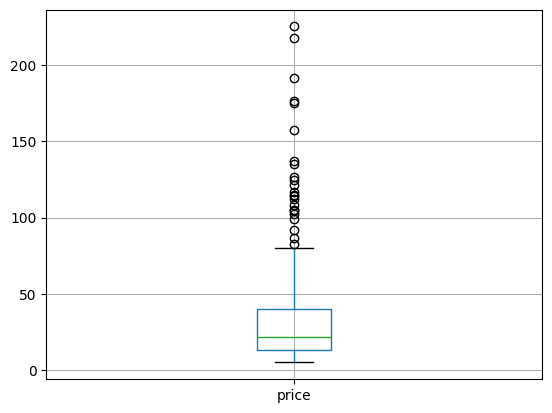

In [522]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
pd.DataFrame(df_boutique_web['price']).boxplot()

In [523]:
#Autre méthode avec plotly express
px.box(df_boutique_web, x='price')

In [524]:
#compter le nombre d'outliers
df_boutique_web.loc[(df_boutique_web['price'] > 80) | (df_boutique_web['price'] < 5.2)].shape[0]

24

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [525]:
#Calcul de la moyenne du prix
print(df_boutique_web['price'].mean())

#Calcul de l'écart-type du prix
print(df_boutique_web['price'].std())


31.369558101473
27.929146118690433


In [526]:
df_boutique_web['price']

,price
0,24.2
1,34.3
2,20.8
3,14.1
4,46.0
...,...
606,49.9
607,8.4
608,27.5
609,69.0


In [527]:
#Calcul du Z-score
df_boutique_web['z_score'] = (df_boutique_web['price'] - df_boutique_web['price'].mean()) / df_boutique_web['price'].std()
print(df_boutique_web['z_score'])

0     -0.256705
1      0.104924
2     -0.378442
3     -0.618335
4      0.523841
         ...   
606    0.663480
607   -0.822422
608   -0.138549
609    1.347354
610   -0.539564
Name: z_score, Length: 611, dtype: float64


In [528]:
#Quel est le seuil prix dont z-score est supérieur à 3 ?
df_boutique_web.loc[df_boutique_web['z_score'] > 3]
#Avec la courbe de la loi normale, quand le z score est > 3 (cad 3x l'ecart type), on considère les valeurs comme aberrantes. Toutes les valeurs qui ressortent ici seront potentiellement aberrantes.

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_date,post_date_gmt,...,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score
186,4352,1,225.0,0,outofstock,15940,5.0,taxable,2018-03-02 10:30:04,2018-03-02 09:30:04,...,Champagne,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",6.932917
188,4355,1,126.5,2,instock,12589,11.0,taxable,2018-03-02 10:46:10,2018-03-02 09:46:10,...,Champagne,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",3.406135
204,4402,1,176.0,8,instock,3510,13.0,taxable,2018-03-22 11:21:05,2018-03-22 10:21:05,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,5.178477
207,4406,1,157.0,3,instock,7819,0.0,taxable,2018-03-22 11:42:48,2018-03-22 10:42:48,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,"41,3%",NaN,NaN,4.498184
348,4904,1,137.0,13,instock,14220,5.0,taxable,2018-05-15 10:23:41,2018-05-15 08:23:41,...,Corton Charlemagne,Blanc,Chardonnay,2019.0,15 ans et +,75cl,13%,12°C,"Poissons nobles, Viande Blanche, Volaille",3.782086
383,5001,1,217.5,20,instock,14581,0.0,taxable,2018-07-17 09:45:39,2018-07-17 07:45:39,...,Charmes-Chambertin Grand Cru,Rouge,Pinot Noir,2014.0,15 ans et +,75cl,"13,5%",15°C,"Andouillettes, Escargots de Bourgogne, Lapin, ...",6.664380
451,5612,1,124.8,12,instock,14915,0.0,taxable,2019-01-15 15:30:49,2019-01-15 14:30:49,...,Alsace Grand Cru,Blanc,Gewurztraminer,2010.0,15 ans et +,"37,5cl",11%,10°C,"Cuisine Exotique, Foie gras poêlé, Munster, Pa...",3.345267
487,5767,1,175.0,12,instock,15185,0.0,taxable,2019-03-13 14:43:22,2019-03-13 13:43:22,...,Clos de Vougeot,Rouge,Pinot Noir,2016.0,15 ans et +,75cl,13%,15°C,"Viande Blanche, Viande rouge, Volaille",5.142672
514,5892,1,191.3,10,instock,14983,3.0,taxable,2019-03-28 10:21:36,2019-03-28 09:21:36,...,Coteaux Champenois,Rouge,Pinot Noir,NaN,10 ans et +,75cl,"12,50%",15°C,"Viande Blanche, Viande rouge, Volaille",5.726292
552,6126,1,135.0,10,instock,14923,2.0,taxable,2019-06-28 17:22:27,2019-06-28 15:22:27,...,Champagne,Blanc,"45% Pinot Noir, 55% Chardonnay",2007.0,10 ans et +,75cl,12%,10°C,"Agneau de l'Aveyron, Apéritif, Brie de Meaux",3.710477


In [529]:
#On compte le nombre de lignes qui ont un z-score inférieur à -3 ou supérieur à 3
df_boutique_web.loc[(df_boutique_web['z_score'] <= -3) | (df_boutique_web['z_score'] >= 3)].shape[0]
#Z scor moins sensible aux outlirs, part de plus loin car moyenne et ecart type sont plus sensibles aux valeurs extremes.

12

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [530]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_boutique_web['price'].describe()

,price
count,611.000000
mean,31.369558
std,27.929146
min,5.200000
25%,13.500000
50%,22.100000
75%,40.350000
max,225.000000


In [531]:
#Si on veut définir un seuil pour les articles "outliers" en termes de prix, on ordonne d'abord nos données en classant par prix en ordre croissant
df_boutique_web.sort_values(by='price')

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_date,post_date_gmt,...,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score
555,6129,1,5.2,30,instock,14570,0.0,taxable,2019-06-28 18:01:06,2019-06-28 16:01:06,...,Pays d'Hérault,Blanc,"Grenache Blanc, Sauvignon Blanc, Terret Blanc",2017.0,3 ans,75cl,"12,50%",11°C,"Apéritif, Fromages, Fruits de mer, Poissons, S...",-0.936998
90,4174,1,5.7,94,instock,16209,6.0,taxable,2018-02-14 17:15:31,2018-02-14 16:15:31,...,Cabardès,Rouge,"Cabernet Franc, Grenache, Merlot, Syrah",2018.0,3-5 ans,75cl,13%,15°C,"Gibier, Grillades, Viande rouge",-0.919096
89,4173,1,5.7,100,instock,16211,13.0,taxable,2018-02-14 17:10:39,2018-02-14 16:10:39,...,Pays d'Oc,Blanc,"Chenin, Colombard, Sauvignon Blanc",2020.0,3 ans,75cl,12%,11°C,"Apéritif, Crustacés, Fromages, Poissons",-0.919096
88,4172,1,5.7,167,instock,16210,43.0,taxable,2018-02-14 16:54:33,2018-02-14 15:54:33,...,Pays d'Oc,Blanc,Chardonnay,2021.0,3 ans,75cl,"12,50%",11°C,"Apéritif, Poissons, Volaille",-0.919096
494,5777,1,5.7,132,instock,14338,0.0,taxable,2019-03-15 10:13:30,2019-03-15 09:13:30,...,Pays d'Oc,Rouge,Cabernet Sauvignon,2017.0,3-5 ans,75cl,13%,15°C,"Gibier, Grillades, Viande rouge",-0.919096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,5767,1,175.0,12,instock,15185,0.0,taxable,2019-03-13 14:43:22,2019-03-13 13:43:22,...,Clos de Vougeot,Rouge,Pinot Noir,2016.0,15 ans et +,75cl,13%,15°C,"Viande Blanche, Viande rouge, Volaille",5.142672
204,4402,1,176.0,8,instock,3510,13.0,taxable,2018-03-22 11:21:05,2018-03-22 10:21:05,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,5.178477
514,5892,1,191.3,10,instock,14983,3.0,taxable,2019-03-28 10:21:36,2019-03-28 09:21:36,...,Coteaux Champenois,Rouge,Pinot Noir,NaN,10 ans et +,75cl,"12,50%",15°C,"Viande Blanche, Viande rouge, Volaille",5.726292
383,5001,1,217.5,20,instock,14581,0.0,taxable,2018-07-17 09:45:39,2018-07-17 07:45:39,...,Charmes-Chambertin Grand Cru,Rouge,Pinot Noir,2014.0,15 ans et +,75cl,"13,5%",15°C,"Andouillettes, Escargots de Bourgogne, Lapin, ...",6.664380


In [532]:
#On calcule l'interquartile
q1, q3 = np.percentile(df_boutique_web['price'], [25, 75])
iqr = q3 - q1
print("Q1 = " + str(q1))
print("Q3 = " + str(round(q3, 2)))
print("IQR = " + str(round(iqr)))

Q1 = 13.5
Q3 = 40.35
IQR = 27


In [533]:
#On calcule ensuite nos valeurs limites
valeur_min = q1 - (1.5 * iqr)
valeur_max = q3 + (1.5 * iqr)
print("Valeur min = " + str(round(valeur_min, 2)))
print("Valeur max = " + str(round(valeur_max, 2)))

Valeur min = -26.78
Valeur max = 80.62


In [534]:
#On détermine enfin le nombre d'outliers dans notre dataset
outliers = df_boutique_web[(df_boutique_web['price'] < valeur_min) | (df_boutique_web['price'] > valeur_max)]
print("nombre d'Outliers détectés = " + str(len(outliers)))

#On détermine la part d'outliers dans notre dataset
print("La part d'outliers est de", round(outliers['price'].shape[0] / df_boutique_web['price'].shape[0],2), " %")

print("Les outliers sont les suivants : ", list(outliers['price']))

nombre d'Outliers détectés = 24
La part d'outliers est de 0.04  %
Les outliers sont les suivants :  [83.0, 225.0, 126.5, 176.0, 108.5, 157.0, 104.0, 102.3, 137.0, 217.5, 105.0, 105.0, 112.0, 86.8, 92.0, 124.8, 175.0, 191.3, 114.0, 135.0, 116.4, 99.0, 115.0, 121.0]


In [535]:
#Voici ma table d'outliers
outliers

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_date,post_date_gmt,...,Appellation,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score
183,4337,1,83.0,13,instock,4679,0.0,taxable,2018-03-01 14:19:24,2018-03-01 13:19:24,...,Champagne,Blanc,"25% Chardonnay, 75% Pinot Noir",NaN,6-8 ans,75cl,12%,10°C,"Coquilles Saint Jacques, Foie gras, Poissons, ...",1.848622
186,4352,1,225.0,0,outofstock,15940,5.0,taxable,2018-03-02 10:30:04,2018-03-02 09:30:04,...,Champagne,Blanc,"30% Chardonnay, 70% Pinot Noir",NaN,10 ans et +,75cl,"12,50%",10°C,"Apéritif, Crustacés, Desserts, Poissons",6.932917
188,4355,1,126.5,2,instock,12589,11.0,taxable,2018-03-02 10:46:10,2018-03-02 09:46:10,...,Champagne,Blanc,Pinot Noir,NaN,5-10 ans,75cl,"12,50%",10°C,"Apéritif, Desserts, Tartes aux fruits",3.406135
204,4402,1,176.0,8,instock,3510,13.0,taxable,2018-03-22 11:21:05,2018-03-22 10:21:05,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,5.178477
205,4404,1,108.5,2,instock,3507,2.0,taxable,2018-03-22 11:32:55,2018-03-22 10:32:55,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,41%,NaN,NaN,2.761647
207,4406,1,157.0,3,instock,7819,0.0,taxable,2018-03-22 11:42:48,2018-03-22 10:42:48,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,"41,3%",NaN,NaN,4.498184
208,4407,1,104.0,6,instock,3509,1.0,taxable,2018-03-22 11:49:53,2018-03-22 10:49:53,...,Cognac Grande Champagne 1er Cru,NaN,NaN,NaN,NaN,70cl,40%,NaN,NaN,2.600525
347,4903,1,102.3,20,instock,14805,0.0,taxable,2018-05-15 10:10:57,2018-05-15 08:10:57,...,Corton,Rouge,Pinot Noir,2019.0,15 ans et +,75cl,"13,5%",15°C,"Boeuf bourguignon, Viande Blanche, Viande en s...",2.539657
348,4904,1,137.0,13,instock,14220,5.0,taxable,2018-05-15 10:23:41,2018-05-15 08:23:41,...,Corton Charlemagne,Blanc,Chardonnay,2019.0,15 ans et +,75cl,13%,12°C,"Poissons nobles, Viande Blanche, Volaille",3.782086
383,5001,1,217.5,20,instock,14581,0.0,taxable,2018-07-17 09:45:39,2018-07-17 07:45:39,...,Charmes-Chambertin Grand Cru,Rouge,Pinot Noir,2014.0,15 ans et +,75cl,"13,5%",15°C,"Andouillettes, Escargots de Bourgogne, Lapin, ...",6.664380


Cependant, ici, nos outliers sont justifiés car on traite les données d'un commerce qui vend des spiritueux et des vins, et il y'a de tous les prix parmi les références, même très élevés et qui pourraient paraître aberrants.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA et des quantités vendues</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [536]:
##############################
# Calculer le CA du site web #
##############################

#On crée d'abord une colonne calculant le CA par article
df_boutique_web['ca_par_article'] = df_boutique_web['price'] * df_boutique_web['stock_quantity']

#Puis on calcule la somme de la colonne "ca_par_article" pour obtenir le chiffre d'affaires du site web
df_boutique_web['ca_par_article'].sum()

np.float64(359120.1)

In [537]:
###############################
# Palmares des articles en CA #
###############################
#On réinitialise l'index du dataset par un reset_index
df_boutique_web = df_boutique_web.reset_index()

#Puis on affiche les 20 premier articles en CA
df_boutique_web.sort_values(by='ca_par_article', ascending=False).head(20)


,index,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_date,...,Couleur,Cépage,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article
561,561,6207,1,25.2,363,instock,16077,37.0,taxable,2019-07-24 09:33:52,...,Rouge,Nielluccio,2018.0,6-8 ans,75cl,14%,15°C,"Cuisine méditerranéenne, Gibiers à plumes, Pig...",-0.220900,9147.6
116,116,4208,1,7.6,578,instock,16024,16.0,taxable,2018-02-15 15:43:45,...,Rosé,"Cabernet Sauvignon, Grenache, Syrah",2021.0,NaN,75cl,"12,50%",11°C,"Apéritif, Grillades, Légumes croquants, Salade",-0.851066,4392.8
383,383,5001,1,217.5,20,instock,14581,0.0,taxable,2018-07-17 09:45:39,...,Rouge,Pinot Noir,2014.0,15 ans et +,75cl,"13,5%",15°C,"Andouillettes, Escargots de Bourgogne, Lapin, ...",6.664380,4350.0
91,91,4176,1,13.5,276,instock,15629,9.0,taxable,2018-02-14 17:25:46,...,Rouge,"Grenache, Mourvèdre, Syrah",2020.0,3-5 ans,75cl,13%,15°C,"Grillades, Viande Blanche, Volaille",-0.639818,3726.0
560,560,6206,1,25.2,120,instock,16580,41.0,taxable,2019-07-24 09:31:48,...,Blanc,Vermentino,2020.0,3-5 ans,75cl,"13,5%",11°C,"Fruits de mer, Langoustes, Poissons, Risotto",-0.220900,3024.0
391,391,5047,1,22.5,129,instock,531,13.0,taxable,2018-07-18 15:58:02,...,NaN,Chardonnay,NaN,3-5 ans,75cl,"12,50%",9°C,"Apéritif, Crustacés, Poissons, Viande Blanche,...",-0.317574,2902.5
9,9,4045,1,42.6,66,instock,16041,14.0,taxable,2018-02-12 10:09:03,...,Rouge,"10% Viognier, 90% Syrah",2020.0,6-8 ans,75cl,"12,50%",16°C,"Gibier, Viande rouge",0.402105,2811.6
219,219,4609,1,11.8,237,instock,15145,0.0,taxable,2018-04-13 14:31:47,...,Rouge,Pinot Noir,2017.0,3-5 ans,75cl,"13,5%",15°C,"Fondue Bourguignonne, Fricassé aux cèpes, Riso...",-0.700686,2796.6
209,209,4558,1,28.1,96,instock,15426,3.0,taxable,2018-04-11 13:32:19,...,Rouge,"Grenache, Mourvèdre, Syrah",2019.0,8-10 ans,75cl,14%,15°C,"Agneau, Grillades, Tajine, Viande rouge",-0.117066,2697.6
110,110,4201,1,38.0,69,instock,15656,0.0,taxable,2018-02-15 14:09:02,...,Rouge,"2,5% Malbec, 2% Pinot Noir, 3,8% Cabernet Fran...",2019.0,15 ans et +,75cl,"13,5%",18°C,"Canard, Gibier, Légumes du Soleil, Pigeon, Via...",0.237402,2622.0


<Axes: xlabel='post_name'>

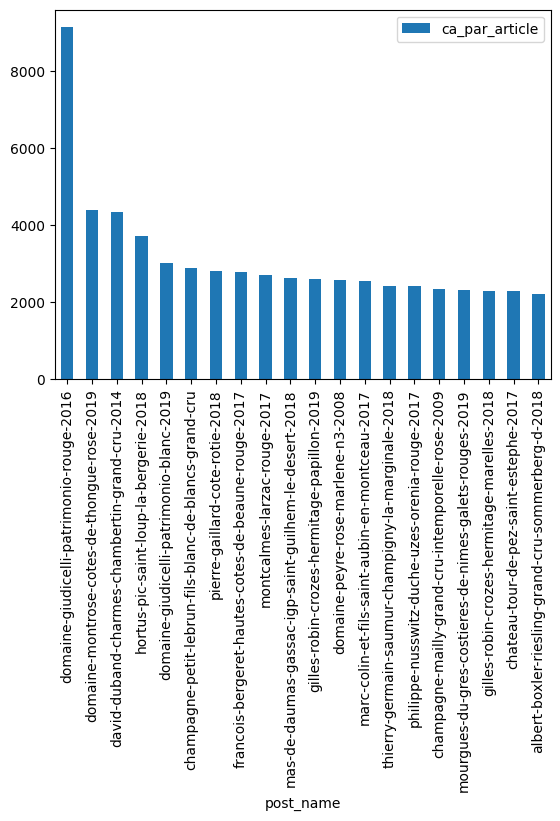

In [538]:
#Graphique en barre des 20 premiers articles avec plotly express
df_boutique_web.sort_values(by='ca_par_article', ascending=False).head(20).plot.bar(x='post_name', y='ca_par_article')

In [539]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#On crée une colonne calculant la part du CA de chaque ligne dans le dataset
df_boutique_web['part_ca'] = df_boutique_web['ca_par_article'] / df_boutique_web['ca_par_article'].sum()

#On crée ensuite une colonne réalisant la somme cumulative de la colonne précedemment créée
df_boutique_web['cumul_part_ca'] = df_boutique_web['part_ca'].cumsum()

In [540]:
#Grâce au deux colonnes créées précédemment, on peut calculer le nombre d'articles représentant 80% du CA
df_boutique_web.loc[df_boutique_web['cumul_part_ca'] >= 0.8].shape[0]

111

In [541]:
df_boutique_web.shape[0]

611

In [542]:
#On peut maintenant calculer la proportion en % que représente ce groupe d'articles dans le catalogue entier du site web
df_boutique_web.loc[df_boutique_web['cumul_part_ca'] >= 0.8].shape[0] / df_boutique_web.shape[0]*100

18.16693944353519

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

In [543]:
###############################
# Palmares des articles en quantité #
###############################

#Pour cela, on trie dans l'ordre décroissant les quantités vendues du dataset df_boutique_web
df_boutique_web.sort_values(by='stock_quantity', ascending=False)

#Réinitialisation l'index du dataset par un reset_index
df_boutique_web = df_boutique_web.reset_index()

#On affiche les 20 premier articles en quantité
df_boutique_web.sort_values(by='stock_quantity', ascending=False).head(20)

,level_0,index,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,...,Millésime,Garde,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article,part_ca,cumul_part_ca
116,116,116,4208,1,7.6,578,instock,16024,16.0,taxable,...,2021.0,NaN,75cl,"12,50%",11°C,"Apéritif, Grillades, Légumes croquants, Salade",-0.851066,4392.8,0.012232,0.228213
561,561,561,6207,1,25.2,363,instock,16077,37.0,taxable,...,2018.0,6-8 ans,75cl,14%,15°C,"Cuisine méditerranéenne, Gibiers à plumes, Pig...",-0.220900,9147.6,0.025472,0.928034
371,371,371,4963,1,7.0,289,instock,15958,2.0,taxable,...,2018.0,4-7 ans,75cl,13%,16°C,"Viande Blanche, Viande rouge, Volaille",-0.872549,2023.0,0.005633,0.597106
328,328,328,4861,1,8.5,284,instock,15307,29.0,taxable,...,2018.0,3-5 ans,75cl,"13,5%",15°C,"Grillades, Viande Blanche, Viande rouge, Volaille",-0.818842,2414.0,0.006722,0.535173
91,91,91,4176,1,13.5,276,instock,15629,9.0,taxable,...,2020.0,3-5 ans,75cl,13%,15°C,"Grillades, Viande Blanche, Volaille",-0.639818,3726.0,0.010375,0.152672
21,21,21,4058,1,8.7,267,instock,16318,11.0,taxable,...,2020.0,3-5 ans,75cl,14%,15°C,"Charcuterie, Grillades, Viande rouge, Volaille",-0.811681,2322.9,0.006468,0.035176
326,326,326,4858,1,6.5,257,instock,16342,1.0,taxable,...,2020.0,3 ans,75cl,"12,50%",10°C,"Apéritif, Charcuterie, Grillades, Poisson gril...",-0.890452,1670.5,0.004652,0.526392
219,219,219,4609,1,11.8,237,instock,15145,0.0,taxable,...,2017.0,3-5 ans,75cl,"13,5%",15°C,"Fondue Bourguignonne, Fricassé aux cèpes, Riso...",-0.700686,2796.6,0.007787,0.387917
496,496,496,5779,1,5.8,211,instock,16213,8.0,taxable,...,2020.0,3-5 ans,75cl,13%,15°C,"Gibier, Grillades, Viande rouge",-0.915515,1223.8,0.003408,0.791317
102,102,102,4191,1,9.3,209,instock,16263,12.0,taxable,...,2019.0,3-5 ans,75cl,14%,14°C,"Cuisine méditerranéenne, Grillades, Légumes fa...",-0.790198,1943.7,0.005412,0.186019


<Axes: xlabel='post_name'>

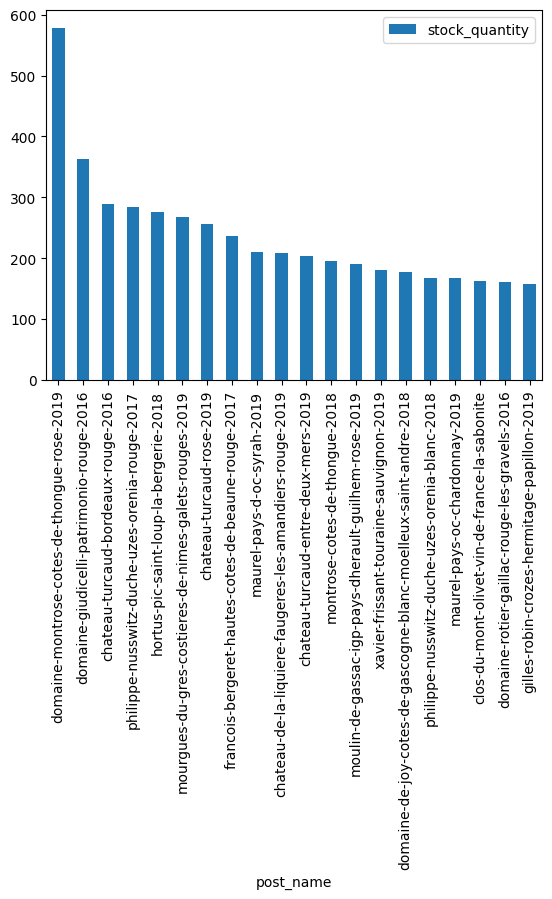

In [544]:
#Graphique en barre des 20 premiers articles avec plotly express
df_boutique_web.sort_values(by='stock_quantity', ascending=False).head(20).plot.bar(x='post_name', y='stock_quantity')

In [545]:
#############################
# Calculer le 20 / 80 en quantités #
#############################

#Création d'une colonne calculant la part en quantité de la ligne dans le dataset
df_boutique_web['part_quantite'] = df_boutique_web['stock_quantity'] / df_boutique_web['stock_quantity'].sum()

#Création d'une colonne réalisant la somme cumulative de la colonne précedemment créée
df_boutique_web['cumul_part_quantite'] = df_boutique_web['part_quantite'].cumsum()

In [546]:
#Grâce au deux colonnes créées précedemment, on peut calculer le nombre d'articles représentant 80% des ventes en quantité
df_boutique_web.loc[df_boutique_web['cumul_part_quantite'] >= 0.8].shape[0]

144

In [547]:
#La proportion en % que représente ce groupe d'articles dans le catalogue entier du site web est :
df_boutique_web.loc[df_boutique_web['cumul_part_quantite'] >= 0.8].shape[0] / df_boutique_web.shape[0]*100

23.567921440261866

In [548]:
df_boutique_web.head()

,level_0,index,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,...,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article,part_ca,cumul_part_ca,part_quantite,cumul_part_quantite
0,0,0,3847,1,24.2,0,outofstock,15298,6.0,taxable,...,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",-0.256705,0.0,0.0,0.0,0.0,0.0
1,1,1,3849,1,34.3,0,outofstock,15296,0.0,taxable,...,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.104924,0.0,0.0,0.0,0.0,0.0
2,2,2,3850,1,20.8,0,outofstock,15300,0.0,taxable,...,75cl,13%,15°C,"Viande rouge, Volaille",-0.378442,0.0,0.0,0.0,0.0,0.0
3,3,3,4032,1,14.1,0,outofstock,19814,3.0,taxable,...,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",-0.618335,0.0,0.0,0.0,0.0,0.0
4,4,4,4039,1,46.0,0,outofstock,19815,0.0,taxable,...,75cl,13%,17°C,"Gibier, Viande rouge",0.523841,0.0,0.0,0.0,0.0,0.0


In [549]:
#On supprime les colonnes inutiles
df_boutique_web = df_boutique_web.drop(columns=['index', 'level_0'])
df_boutique_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,total_sales,tax_status,post_date,post_date_gmt,...,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article,part_ca,cumul_part_ca,part_quantite,cumul_part_quantite
0,3847,1,24.2,0,outofstock,15298,6.0,taxable,2018-02-08 12:58:52,2018-02-08 11:58:52,...,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",-0.256705,0.0,0.0,0.0,0.0,0.0
1,3849,1,34.3,0,outofstock,15296,0.0,taxable,2018-02-08 13:49:41,2018-02-08 12:49:41,...,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.104924,0.0,0.0,0.0,0.0,0.0
2,3850,1,20.8,0,outofstock,15300,0.0,taxable,2018-02-08 14:08:36,2018-02-08 13:08:36,...,75cl,13%,15°C,"Viande rouge, Volaille",-0.378442,0.0,0.0,0.0,0.0,0.0
3,4032,1,14.1,0,outofstock,19814,3.0,taxable,2018-02-09 14:01:05,2018-02-09 13:01:05,...,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",-0.618335,0.0,0.0,0.0,0.0,0.0
4,4039,1,46.0,0,outofstock,19815,0.0,taxable,2018-02-12 09:04:37,2018-02-12 08:04:37,...,75cl,13%,17°C,"Gibier, Viande rouge",0.523841,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Extraction de notre base nettoyée, consolidée et analysée pour la mettre à disposition sur un fichier Excel</h3>
</div>

In [551]:
#On supprime les colonnes qui ne nous serviront à rien dans le fichier final :
df_boutique_web = df_boutique_web.drop(columns=['onsale_web', 'tax_status', 'post_date', 'post_date_gmt', 'post_status', 'post_modified', 'post_modified_gmt'])
df_boutique_web.head()

,product_id,price,stock_quantity,stock_status,id_web,total_sales,post_title,post_excerpt,post_name,guid,...,Contenance,Degré d'alcool,Température dégustation,Alliance mets,z_score,ca_par_article,part_ca,cumul_part_ca,part_quantite,cumul_part_quantite
0,3847,24.2,0,outofstock,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,https://www.bottle-neck.fr/?post_type=product&...,...,75cl,13%,15°C,"Charcuterie, Lapin, Viande rouge, Volaille",-0.256705,0.0,0.0,0.0,0.0,0.0
1,3849,34.3,0,outofstock,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,https://www.bottle-neck.fr/?post_type=product&...,...,75cl,13%,15°C,"Charcuterie, Viande rouge, Volaille",0.104924,0.0,0.0,0.0,0.0,0.0
2,3850,20.8,0,outofstock,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,https://www.bottle-neck.fr/?post_type=product&...,...,75cl,13%,15°C,"Viande rouge, Volaille",-0.378442,0.0,0.0,0.0,0.0,0.0
3,4032,14.1,0,outofstock,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,https://www.bottle-neck.fr/?post_type=product&...,...,75cl,13%,14°C,"Charcuterie, Viande rouge, Volaille",-0.618335,0.0,0.0,0.0,0.0,0.0
4,4039,46.0,0,outofstock,19815,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,https://www.bottle-neck.fr/?post_type=product&...,...,75cl,13%,17°C,"Gibier, Viande rouge",0.523841,0.0,0.0,0.0,0.0,0.0


In [552]:
df_boutique_web.to_excel('df_boutique_web.xlsx')